#                                                    ELECTION AD SPENDING ANALYSIS - 2024

## All the parties in India usually spend a lot of money on election campaigns. I recently collected data from Meta ads about how much money was spent on Instagram and Facebook ads by each political party during the Indian elections 2024 in each state. In this article, we perform elections ad spending analysis using Python and how it impacted the voting patterns.¶

## The dataset I have collected contains three files:

## The Advertisers Dataset :  provides insights into which pages (parties or organizations) spend money on election ads and the volume of ads they run.
## The Locations Dataset :  shows how much money was spent on ads in different locations, indicating where the campaigns were focusing their efforts.
## The Results Dataset : provides actual voting data, showing how many people voted in each area and the percentage of voter turnout.

In [3]:
import pandas as pd

results = pd.read_csv(r"D:\elections-data\results.csv")
advertisers = pd.read_csv(r"D:\elections-data\advertisers.csv")
locations = pd.read_csv(r"D:\elections-data\locations.csv")

results.head()

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase
0,1,1.0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0
1,2,2.0,Arunachal Pradesh,Arunachal East,375310,83.31,312658,1.0
2,3,3.0,Arunachal Pradesh,Arunachal West,517384,73.60,380783,1.0
3,4,4.0,Assam,Dibrugarh,1659588,76.75,1273744,1.0
4,5,5.0,Assam,Jorhat,1727121,79.89,1379749,1.0


In [4]:
advertisers.head()

,Page ID,Page name,Disclaimer,Amount spent (INR),Number of ads in Library
0,121439954563203,Bharatiya Janata Party (BJP),Bharatiya Janata Party (BJP),193854342,43455
1,351616078284404,Indian National Congress,Indian National Congress,108787100,846
2,132715103269897,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,73361399,1799
3,192856493908290,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,32294327,680
4,109470364774303,Ellorum Nammudan,Populus Empowerment Network Private Limited,22399499,879


In [5]:
locations.head()

,Location name,Amount spent (INR)
0,Andaman and Nicobar Islands,377858
1,Andhra Pradesh,100819732
2,Arunachal Pradesh,1385654
3,Assam,17478091
4,Bihar,53619242


### The results data has a column named state, and the location data has a column named location name. We will merge these datasets using these columns

In [6]:
results['State'] = results['State'].str.strip().str.lower()

locations['Location name'] = locations['Location name'].str.strip().str.lower()

merged_data = results.merge(
    locations,
    left_on='State',
    right_on='Location name',
    how='left'
)

merged_data.head()

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase,Location name,Amount spent (INR)
0,1,1.0,andaman & nicobar islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0,NaN,NaN
1,2,2.0,arunachal pradesh,Arunachal East,375310,83.31,312658,1.0,arunachal pradesh,1385654.0
2,3,3.0,arunachal pradesh,Arunachal West,517384,73.60,380783,1.0,arunachal pradesh,1385654.0
3,4,4.0,assam,Dibrugarh,1659588,76.75,1273744,1.0,assam,17478091.0
4,5,5.0,assam,Jorhat,1727121,79.89,1379749,1.0,assam,17478091.0


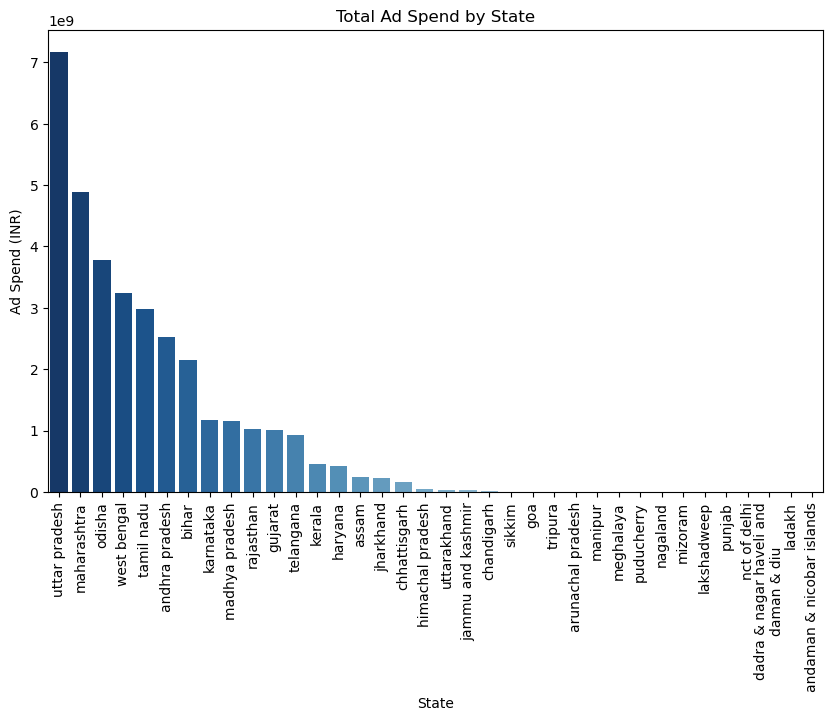

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping data by state and summing ad spend
state_ad_spend = merged_data.groupby('State')['Amount spent (INR)'].sum().reset_index()

# Sorting data in descending order
state_ad_spend = state_ad_spend.sort_values(by='Amount spent (INR)', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=state_ad_spend, x='State', y='Amount spent (INR)', palette='Blues_r', hue = 'State', legend = False)

# Formatting
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Ad Spend (INR)')
plt.title('Total Ad Spend by State')

# Show plot
plt.show()


### The bar graph shows the total ad spend (in INR) by state. Uttar Pradesh leads significantly with the highest ad spend, followed by Maharashtra and Odisha. States like West Bengal, Tamil Nadu, Andhra Pradesh, and Bihar also show substantial ad expenditures. In contrast, states such as Lakshadweep, Dadra & Nagar Haveli, Daman & Diu, Andaman & Nicobar Islands, and Arunachal Pradesh have the lowest ad spend. It indicates that larger and more populous states tend to spend more on ads, likely reflecting their greater political significance and larger voter base.

## Now lets have a look at average voter turnout by state

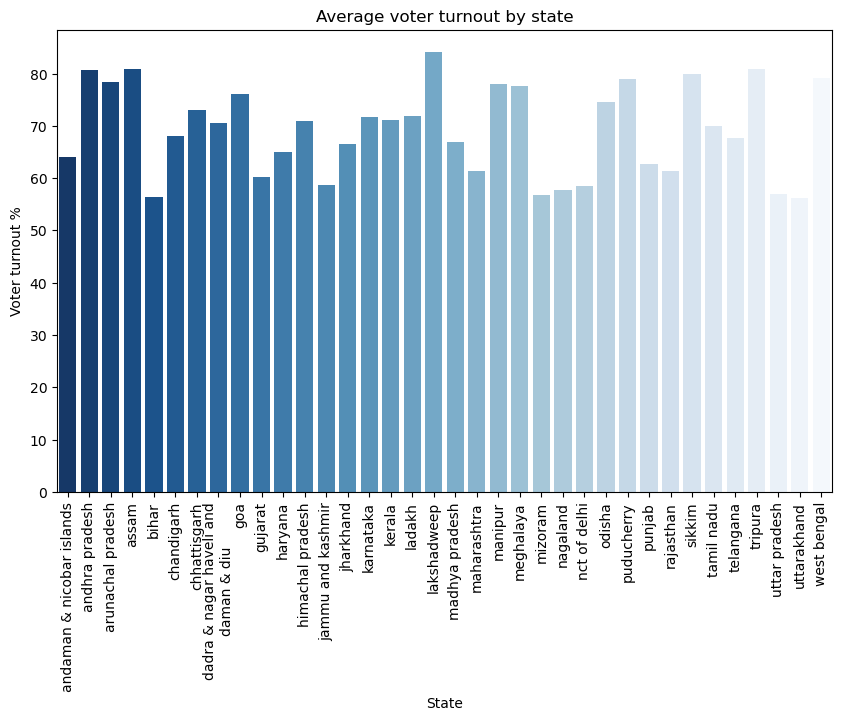

In [9]:
state_voter_turnout = merged_data.groupby('State')['Polled (%)'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=state_voter_turnout, x='State', y='Polled (%)', palette='Blues_r', hue = 'State', legend = False)

# Formatting
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Voter turnout %')
plt.title('Average voter turnout by state')

# Show plot
plt.show()

### Lakshadweep has the highest average voter turnout at nearly 80%, followed closely by Tripura and Assam. States like Andhra Pradesh, Sikkim, and West Bengal also show high voter engagement, with turnouts above 70%. On the other end of the spectrum, states such as Bihar, Uttar Pradesh, and Uttarakhand have the lowest average voter turnout, around 50-55%. It indicates significant regional variations in voter participation, with some smaller states and union territories exhibiting higher engagement compared to larger states with higher ad spend.

### Now we will look at top 5 parties by Ad spend

In [12]:
advertisers['Amount spent (INR)'] = pd.to_numeric(advertisers['Amount spent (INR)'], errors='coerce')

advertisers.dropna(subset=['Amount spent (INR)'], inplace=True)

party_ad_spend = advertisers.groupby('Page name')['Amount spent (INR)'].sum().sort_values(ascending=False)

top_5_parties = party_ad_spend.head(5).reset_index()

top_5_parties

,Page name,Amount spent (INR)
0,Bharatiya Janata Party (BJP),193854342.0
1,Ama Chinha Sankha Chinha,112412941.0
2,Indian National Congress,108787100.0
3,Ellorum Nammudan,23806041.0
4,BJP Odisha,19573782.0


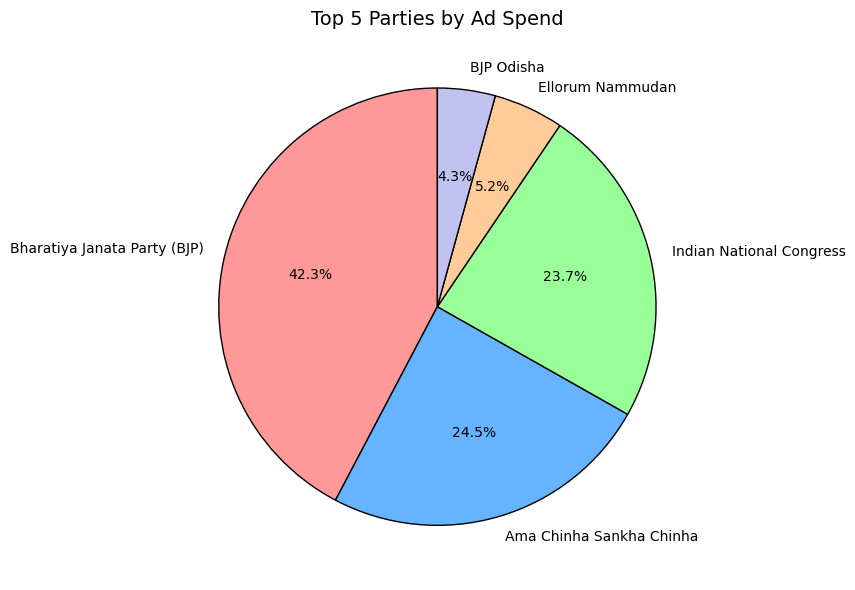

In [14]:
# Define colors
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Extracting data
labels = top_5_parties['Page name']
sizes = top_5_parties['Amount spent (INR)']

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})

# Add title
plt.title('Top 5 Parties by Ad Spend', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


### The Bharatiya Janata Party (BJP) has the highest ad spend, accounting for 42.3% of the total. 
### This is followed by the Ama Chinha Sankha Chinha party at 24.5% and the Indian National Congress at 23.7%. 
### Ellorum Nammudan and BJP Odisha have significantly lower ad spends, at 5.19% and 4.27%, respectively. 
### It indicates that BJP dominates in terms of ad spending on Facebook and Instagram ads, with nearly half of the total expenditure, suggesting a significant investment in advertising compared to other parties.

## Now, let’s have a look at the correlation between ad spend and voter turnout

In [15]:
# calculate the correlation between ad spend and voter turnout
correlation = merged_data[['Amount spent (INR)', 'Polled (%)']].corr()
print(correlation)

                    Amount spent (INR)  Polled (%)
Amount spent (INR)            1.000000   -0.010688
Polled (%)                   -0.010688    1.000000


### The correlation matrix shows that the relationship between the amount spent (INR) and the percentage of votes polled (%) is very weak and slightly negative, with a correlation coefficient of -0.010688. 
### This indicates that there is virtually no linear relationship between ad spend and voter turnout. In other words, increasing the amount spent on advertising does not significantly affect the percentage of voter turnout.

## let’s have a look at the relationship between ad spend and voter turnout by States

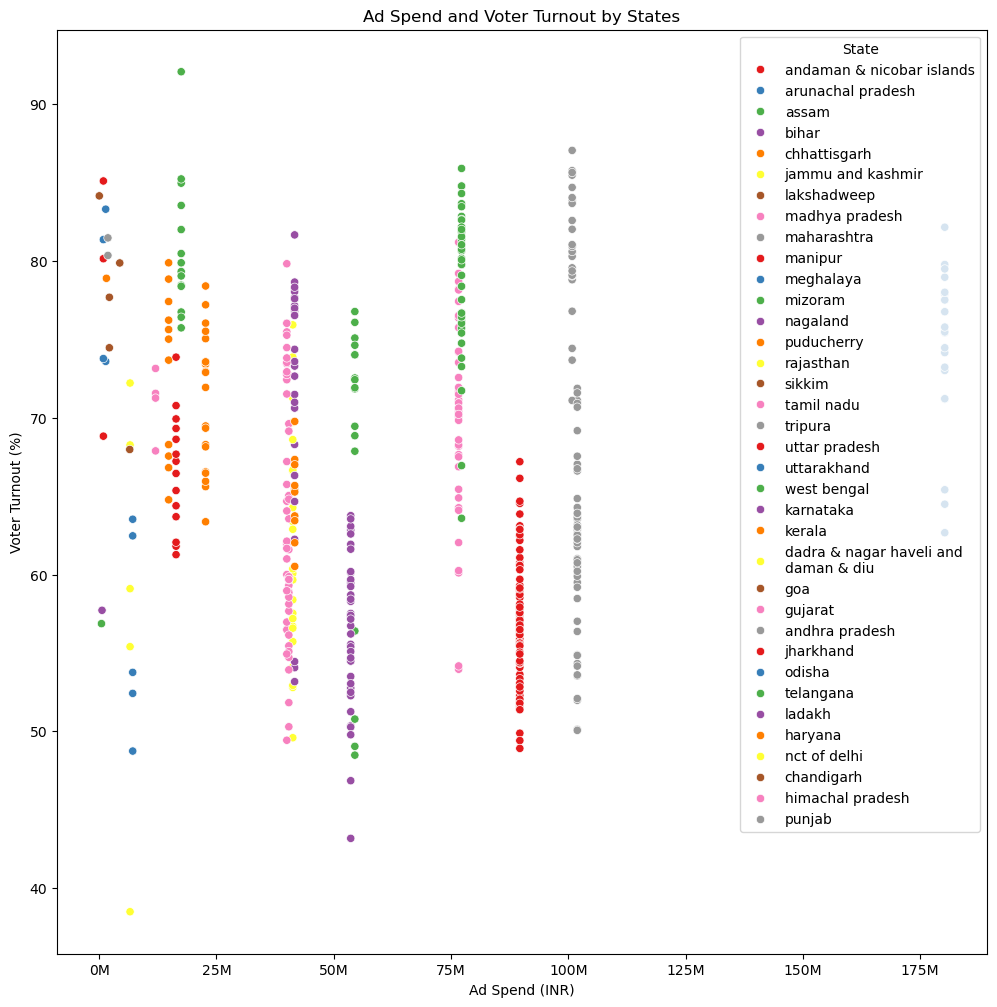

In [26]:
merged_constituency_data = results.merge(
    locations,
    left_on='State',
    right_on='Location name',
    how='left'
)

# Set figure size
plt.figure(figsize=(12, 12))

#creating scatter plot

sns.scatterplot(data = merged_constituency_data, x = 'Amount spent (INR)', y = 'Polled (%)', hue = 'State', palette = 'Set1')

# Format x-axis labels in millions (M)
import matplotlib.ticker as mticker
ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))

# Labels and title
plt.xlabel('Ad Spend (INR)')
plt.ylabel('Voter Turnout (%)')
plt.title('Ad Spend and Voter Turnout by States')

# Show plot
plt.show()

### It shows that higher ad spending does not necessarily correlate with higher voter turnout. 
### Voter turnout seems to cluster between 60% and 80% across most constituencies, regardless of the ad spend amount, which ranges from 0 to 150 million INR. 
### This suggests that other factors besides ad spend may play a significant role in influencing voter turnout.

## let’s have a look at the distribution of ad spending:

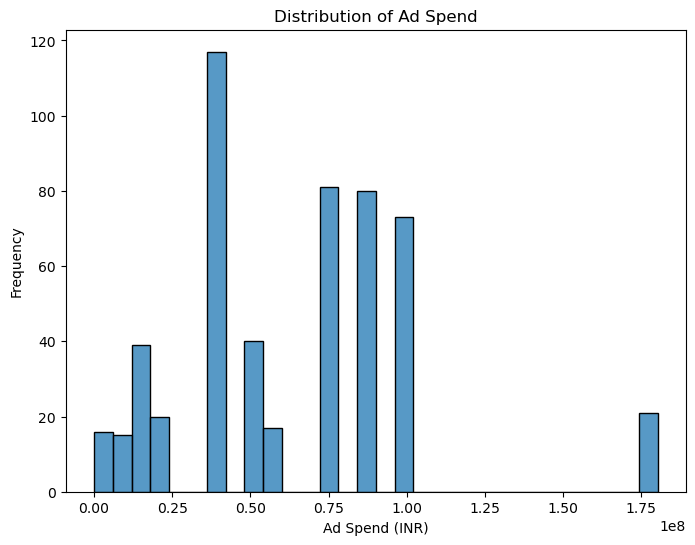

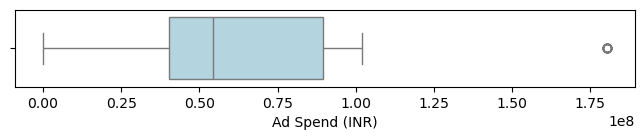

In [27]:
# Set figure size
plt.figure(figsize=(8, 6))

# Create histogram with 30 bins
sns.histplot(merged_data['Amount spent (INR)'], bins=30, kde=False, edgecolor='black')

# Labels and title
plt.xlabel('Ad Spend (INR)')
plt.ylabel('Frequency')
plt.title('Distribution of Ad Spend')

# Show plot
plt.show()

# Create a separate box plot as marginal distribution
plt.figure(figsize=(8, 1))
sns.boxplot(x=merged_data['Amount spent (INR)'], color='lightblue')
plt.xlabel('Ad Spend (INR)')
plt.show()

### The histogram indicates that most constituencies have ad spends clustered around the 50M and 100M INR marks, with fewer constituencies spending less than 10M INR or more than 150M INR. 
### The box plot highlights that the median ad spend is around 70M INR, with the interquartile range (IQR) spanning from approximately 30M to 110M INR.

### There are a few outliers, particularly a constituency with an exceptionally high ad spend above 150M INR. 
### This distribution suggests that while the majority of ad spends are concentrated within a certain range, there are notable exceptions with significantly higher expenditures.

## let’s analyze ad spending and voter turnout by election phase

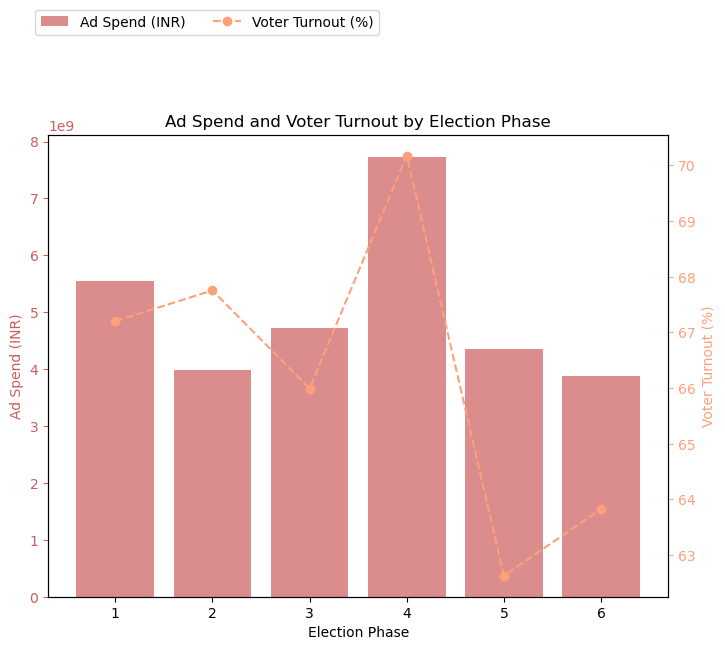

In [28]:
phase_analysis = merged_data.groupby('Phase').agg({
    'Amount spent (INR)': 'sum',
    'Polled (%)': 'mean'
}).reset_index()

# Set figure size
fig, ax1 = plt.subplots(figsize=(8, 6))

# Bar plot for Ad Spend
ax1.bar(phase_analysis['Phase'], phase_analysis['Amount spent (INR)'], 
        color='indianred', label='Ad Spend (INR)', alpha=0.7)
ax1.set_xlabel('Election Phase')
ax1.set_ylabel('Ad Spend (INR)', color='indianred')
ax1.tick_params(axis='y', colors='indianred')

# Create secondary y-axis for Voter Turnout
ax2 = ax1.twinx()
ax2.plot(phase_analysis['Phase'], phase_analysis['Polled (%)'], 
         color='lightsalmon', marker='o', linestyle='dashed', label='Voter Turnout (%)')
ax2.set_ylabel('Voter Turnout (%)', color='lightsalmon')
ax2.tick_params(axis='y', colors='lightsalmon')

# Title and legend
plt.title('Ad Spend and Voter Turnout by Election Phase')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 1.1), ncol=2)

plt.show()

### There is no consistent trend between ad spend and voter turnout. 
### Election phases 1 and 4 have the highest ad spends, with phase 4 peaking in voter turnout at around 70%. 
### However, phase 1, despite high ad spend, has a lower voter turnout of about 67%. Phases with moderate ad spend (e.g., 2 and 6) have lower voter turnout, while phase 5 has a notably low turnout despite moderate spending.

# Conclusion

### Overall, the analyses indicate that higher ad spend does not guarantee higher voter turnout and voter engagement is influenced by various other factors. 
### Larger and more significant states tend to spend more on ads, but this does not necessarily translate to higher voter participation. 
### Political parties, particularly the BJP, invest heavily in advertising, yet the effectiveness of this spending in increasing voter turnout is questionable.